## Análise de Vendas da empresa em 2021

### Objetivo dessa análise é explorar os resultados de vendas ao longo do ano e obter algumas repostas.



Através dessa analise queremos obter os seguintes resultados:

Valor Total de Vendas em 2021

Quantidade Total Vendida

Ticket médio de vendas

Abertura por mês

Abertura por Vendedor


In [1]:
# importação das bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import datetime

import warnings

warnings.filterwarnings ('ignore')

In [2]:
# importação do dataset

planilha = pd.read_excel("controle_da_empresa2021.xlsx", None) # None serve para trazer todas as abas da planilha
df = planilha['Vendas']

# ver as 5 primeiras entradas
df.head()


,Data da Venda,Item,Quantidade,Vendedor,Preço Unitário,Total de Vendas
0,2021-01-02,Lente 50mm f/1.4,2,Carlos,1649,3298
1,2021-01-02,Filtro ND 5 Stop,2,Raquel,1220,2440
2,2021-01-03,Filtro ND 5 Stop,2,Raquel,1220,2440
3,2021-01-03,Lente 16-35mm f/2.8,2,Carlos,8997,17994
4,2021-01-04,Lente 16-35mm f/2.8,2,Fernanda,8997,17994


In [3]:
# identificação de linhas e colunas

print('Esse dataset possui', df.shape[0], 'linhas e', df.shape[1], 'colunas.')

Esse dataset possui 424 linhas e 6 colunas.


In [4]:
# ajuste dos nomes das colunas

colunas = {'Data da Venda':'data_venda','Item':'item','Quantidade':'quantidade',
           'Vendedor':'vendedor','Preço Unitário':'preco_unitario',
          'Total de Vendas':'total_vendas'}

df.rename(columns=colunas, inplace=True)

In [5]:
# inclusão da colunas mês

df['mes'] = df['data_venda'].dt.month 

In [6]:
# ver as 5 primeiras entradas
df.head()

,data_venda,item,quantidade,vendedor,preco_unitario,total_vendas,mes
0,2021-01-02,Lente 50mm f/1.4,2,Carlos,1649,3298,1
1,2021-01-02,Filtro ND 5 Stop,2,Raquel,1220,2440,1
2,2021-01-03,Filtro ND 5 Stop,2,Raquel,1220,2440,1
3,2021-01-03,Lente 16-35mm f/2.8,2,Carlos,8997,17994,1
4,2021-01-04,Lente 16-35mm f/2.8,2,Fernanda,8997,17994,1


In [7]:
# verificação dos tipos de dados do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data_venda      424 non-null    datetime64[ns]
 1   item            424 non-null    object        
 2   quantidade      424 non-null    int64         
 3   vendedor        424 non-null    object        
 4   preco_unitario  424 non-null    int64         
 5   total_vendas    424 non-null    int64         
 6   mes             424 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 23.3+ KB


In [8]:
# verificando valores nulos

var_null = df.isnull().sum().sort_values(ascending=[False])
pd.DataFrame(var_null,columns=['Qtde_Nulos'])

,Qtde_Nulos
data_venda,0
item,0
quantidade,0
vendedor,0
preco_unitario,0
total_vendas,0
mes,0


In [9]:
# análise descritiva inicial do dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantidade,424.0,1.514151,0.500390,1.0,1.0,2.0,2.0,2.0
preco_unitario,424.0,5996.268868,4805.667398,1220.0,1220.0,5790.0,8997.0,13650.0
total_vendas,424.0,9098.325472,8231.879820,1220.0,2440.0,8500.0,13650.0,27300.0
mes,424.0,5.757075,3.731528,1.0,2.0,6.0,9.0,12.0


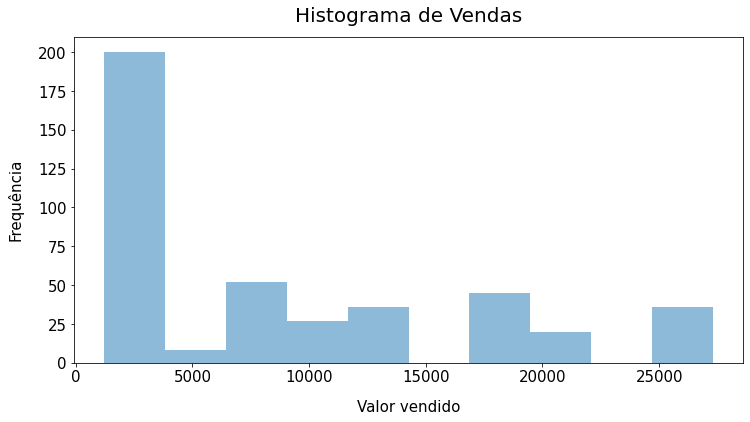

In [10]:
# Distribuição dos dados = Total de vendas

plt.figure(figsize=(12,6))
plt.hist(x='total_vendas',data=df,alpha=0.5)
plt.title("Histograma de Vendas",fontsize=(20),pad=15)
plt.ylabel("Frequência",fontsize=(15),labelpad=15)
plt.xlabel("Valor vendido",fontsize=(15),labelpad=15)
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15) 
plt.show()

#### Valor total vendido em 2021 e quantidade total

In [11]:
valor_2021 = df['total_vendas'].sum()
print(valor_2021)

quantidade_2021 = df['quantidade'].sum()
print(quantidade_2021)

3857690
642


In [12]:
print(f'O valor total vendido em 2021 foi de R$ {valor_2021}.')
print(f'\nA quantidade total que foi vendido em 2021 é de {quantidade_2021} unidades')

O valor total vendido em 2021 foi de R$ 3857690.

A quantidade total que foi vendido em 2021 é de 642 unidades


#### Ticket médio de vendas mensal

In [13]:
df_groupby = df.groupby('mes')[('quantidade','total_vendas')].sum()
df_groupby 

,quantidade,total_vendas
mes,,
1,139,855799
2,43,254522
3,53,273834
4,41,273674
5,46,277773
6,45,267447
7,43,273831
8,47,244092
9,44,274004


In [14]:
df_groupby['ticket_medio'] = df_groupby['total_vendas'] / df_groupby['quantidade']
df_groupby

,quantidade,total_vendas,ticket_medio
mes,,,
1,139,855799,6156.827338
2,43,254522,5919.116279
3,53,273834,5166.679245
4,41,273674,6674.975610
5,46,277773,6038.543478
6,45,267447,5943.266667
7,43,273831,6368.162791
8,47,244092,5193.446809
9,44,274004,6227.363636


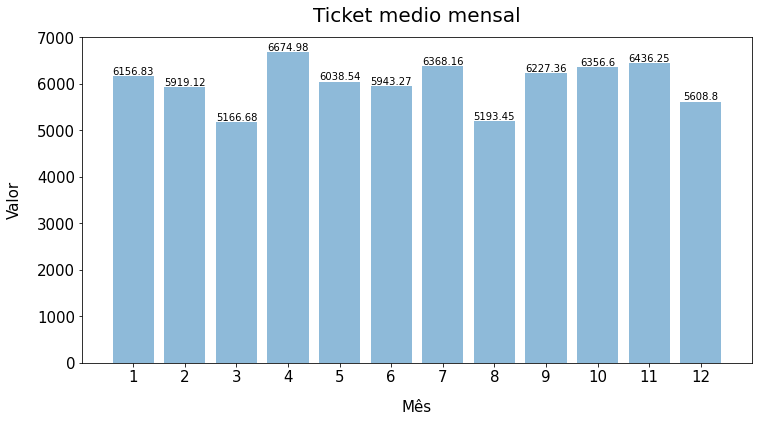

In [15]:
figure, ax = plt.subplots(figsize=(12, 6))
media = plt.bar(df_groupby.index,df_groupby['ticket_medio'],data=df_groupby,alpha=0.5)
plt.title("Ticket medio mensal",fontsize=(20),pad=15)
plt.ylabel("Valor",fontsize=(15),labelpad=15)
plt.xlabel("Mês",fontsize=(15),labelpad=15)
ax.bar_label(media);
plt.yticks(fontsize=15) 
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],fontsize=15) 

plt.show()

#### Valor vendido mensalmente e quantidade total mês

In [16]:
valor_mensal = df.pivot_table(index='mes', values='total_vendas', aggfunc='sum')
valor_mensal

,total_vendas
mes,
1,855799
2,254522
3,273834
4,273674
5,277773
6,267447
7,273831
8,244092
9,274004


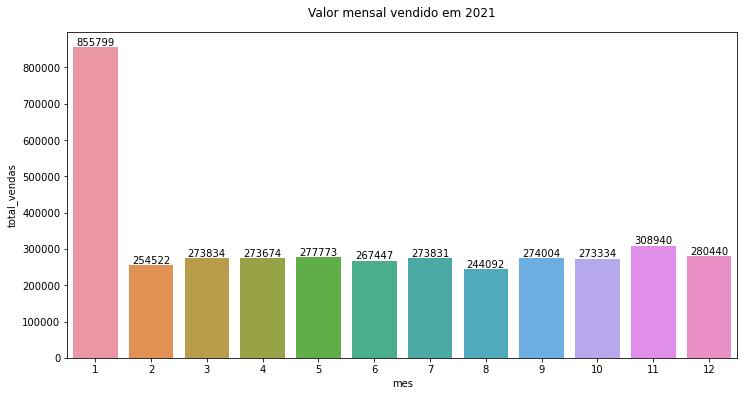

In [17]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=valor_mensal,x=valor_mensal.index,y='total_vendas')
ax.set_title('Valor mensal vendido em 2021',pad=15)
ax.bar_label(ax.containers[0]);

In [18]:
valor_mensal = df.pivot_table(index='mes', values='quantidade', aggfunc='sum')
valor_mensal

,quantidade
mes,
1,139
2,43
3,53
4,41
5,46
6,45
7,43
8,47
9,44


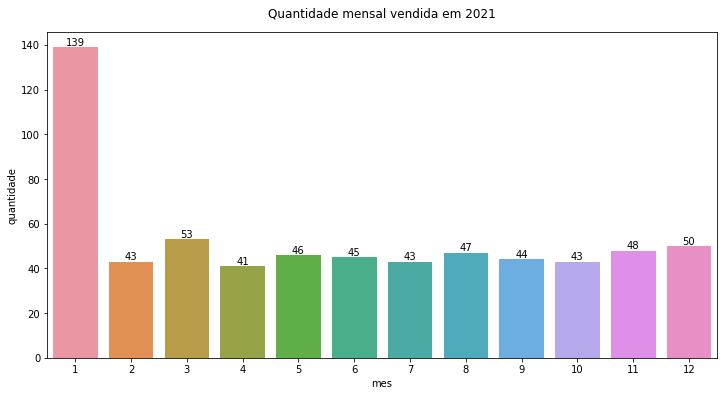

In [19]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=valor_mensal,x=valor_mensal.index,y='quantidade')
ax.set_title('Quantidade mensal vendida em 2021',pad=15)
ax.bar_label(ax.containers[0]);

#### Abertura por vendedor

In [23]:
vendas_vendedor = df.groupby('vendedor')['total_vendas'].sum()
vendas_vendedor.sort_values(ascending=False).to_frame()

,total_vendas
vendedor,
Theo,1285724
Carlos,932764
Fernanda,853949
Raquel,785253


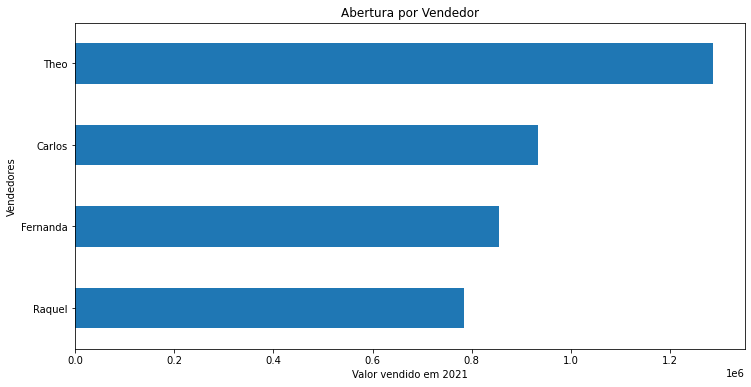

In [22]:
plt.figure(figsize=(12,6))
ax = vendas_vendedor.sort_values(ascending=True).plot(x='total_vendas',y=vendas_vendedor.index,kind='barh',
                                                 title='Abertura por Vendedor',xlabel='Vendedores')
ax.set_xlabel('Valor vendido em 2021')
plt.show()